In [139]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import numpy as np
import os

In [145]:
matplotlib.rc('legend', fontsize=10)

In [55]:
# option 1: separate runs with one current step per file (NeuroML2)
dt = 0.001
threshold = -0.025
dat_files = [f for f in os.listdir('separate runs') if os.path.isfile(os.path.join('separate runs', f)) and os.path.splitext(f)[1] == '.dat']
currents = np.array([float(f[:-6]) for f in dat_files])  # pA
spike_trains = []
for f in dat_files:
    t, v, i = np.genfromtxt(os.path.join('separate runs', f)).transpose()
    spike_trains.append(v[int(50/dt):int(-50/dt)])  # trim start and end to prevent any spikes from other current steps
#zip(dat_files, currents)

In [98]:
# option 2: increasing (XPP)
spike_trains = []
dt = 0.1
threshold = -25
t, v = np.genfromtxt('increasing.dat').transpose()[:2]
for start in range(int(3050/dt), int(10051/dt), int(500/dt)):
    spike_trains.append(v[start:start+int(400/dt)])
currents = np.array([-1.9, -1.7, -1.2, -0.5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [90]:
# option 3: decreasing (XPP)
spike_trains = []
dt = 0.1
threshold = -25
t, v = np.genfromtxt('decreasing.dat').transpose()[:2]
for start in range(int(50/dt), int(7551/dt), int(500/dt)):
    spike_trains.append(v[start:start+int(400/dt)])
currents = np.array([50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0, -1.2 , -1.9, -2.4, -2.7, -2.72])
#spike_trains

In [99]:
ms_to_index = lambda ms: int(ms / dt)  # TODO: Make this better
index_to_ms = lambda ind: ind * dt

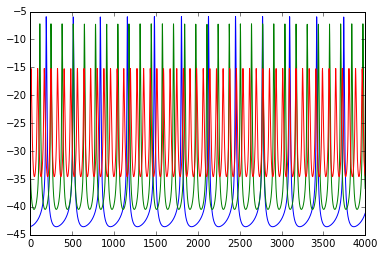

In [100]:
for s in spike_trains[::5]:
    plt.plot(s)

In [101]:
spike_times = []
for spike_train in spike_trains:
    current_spike_times = []
    for i in range(spike_train.size-1):
        if spike_train[i] < threshold and spike_train[i+1] >= threshold:
            current_spike_times.append(index_to_ms(i))
    spike_times.append(np.array(current_spike_times))
spike_times

[array([  18. ,   50.3,   82.6,  114.9,  147.2,  179.6,  211.9,  244.2,
         276.5,  308.8,  341.1,  373.4]),
 array([  28.2,   57.9,   87.7,  117.4,  147.1,  176.9,  206.6,  236.3,
         266. ,  295.8,  325.5,  355.2,  385. ]),
 array([  21. ,   46.5,   71.9,   97.4,  122.9,  148.3,  173.8,  199.2,
         224.7,  250.2,  275.6,  301.1,  326.6,  352. ,  377.5]),
 array([  19.5,   41.4,   63.3,   85.2,  107.2,  129.1,  151. ,  172.9,
         194.9,  216.8,  238.7,  260.6,  282.6,  304.5,  326.4,  348.3,
         370.3,  392.2]),
 array([  18.1,   38.3,   58.5,   78.7,   99. ,  119.2,  139.4,  159.6,
         179.8,  200.1,  220.3,  240.5,  260.7,  280.9,  301.2,  321.4,
         341.6,  361.8,  382. ]),
 array([  10.4,   23.7,   37. ,   50.3,   63.6,   76.9,   90.2,  103.5,
         116.8,  130.2,  143.5,  156.8,  170.1,  183.4,  196.7,  210. ,
         223.3,  236.6,  250. ,  263.3,  276.6,  289.9,  303.2,  316.5,
         329.8,  343.1,  356.4,  369.7,  383.1,  396.4]),
 arr

In [102]:
durations = [times[1:] - times[:-1] for times in spike_times]  # time between spikes, ms
frequencies = [1000. / d for d in durations]  # Hz

In [103]:
mean_frequencies = [np.mean(f) for f in frequencies]
sem_frequencies = [sp.stats.sem(f) for f in frequencies]
zip(mean_frequencies, sem_frequencies)

[(30.951065522788941, 0.0086867991924752912),
 (33.632371439977696, 0.01605922885496202),
 (39.270826440812549, 0.020517887677696068),
 (45.613263985544393, 0.022010300072423647),
 (49.464306036514991, 0.022042552494210794),
 (75.129924657242697, 0.032293405685965282),
 (91.511444722453888, 0.063143836889004226),
 (103.74759031095465, 0.082827237348307645),
 (113.23010493081992, 0.090691181985194366),
 (120.63823534928505, 0.066794534698295355),
 (126.35623869801086, 0.079917131689256432),
 (130.70778550654711, 0.12080841393136116),
 (133.77528471868095, 0.10750561482809756),
 (135.71790969051244, 0.11809704971135053),
 (136.57493109547909, 0.10571314508001618)]

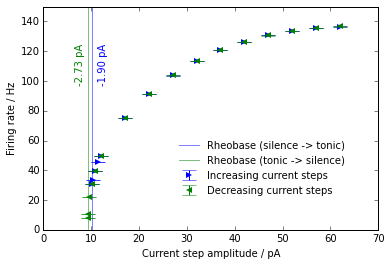

In [159]:
plt.axvline(-1.90+12, label="Rheobase (silence -> tonic)", color='b', alpha=0.5)
plt.text(11.4, 120, '-1.90 pA', color='b', rotation=90)
plt.axvline(-2.73+12, label="Rheobase (tonic -> silence)", color='g', alpha=0.5)
plt.text(6.5, 120, '-2.73 pA', color='g', rotation=90)
plt.errorbar(currents+12, mean_frequencies, yerr=sem_frequencies, fmt='b>', capsize=7, label="Increasing current steps", markeredgecolor='none')
plt.errorbar(currents_2+12, mean_frequencies_2, yerr=sem_frequencies_2, fmt='g<', capsize=7, label="Decreasing current steps", markeredgecolor='none')
#plt.axvspan(0, -1.9+12, edgecolor='none', alpha=0.1, label="No spiking")

plt.ylim(0, 150)
plt.xlim(0, 70)
plt.xlabel('Current step amplitude / pA')
plt.ylabel('Firing rate / Hz')
plt.legend(loc='lower right', numpoints=1, borderaxespad=3, frameon=False)

plt.savefig("test.png", dpi=300)

In [97]:
mean_frequencies_2 = mean_frequencies
sem_frequencies_2 = sem_frequencies
currents_2 = currents

In [160]:
np.genfromtxt('https://drive.google.com/uc?id=0B2xSDxvcBl6KM1lRT1hiQ2NKLTg&export=download')

array([[  0.00000000e+00,  -5.45613770e-02,   0.00000000e+00],
       [  1.00000000e-06,  -5.45613770e-02,  -1.20000000e-11],
       [  2.00000000e-06,  -5.45613770e-02,  -1.20000000e-11],
       ..., 
       [  5.29998000e-01,  -5.45613770e-02,  -1.20000000e-11],
       [  5.29999000e-01,  -5.45613770e-02,  -1.20000000e-11],
       [  5.30000000e-01,  -5.45613770e-02,  -1.20000000e-11]])